In [ ]:
#LAUNCH JUPYER WITH COMMAND BELOW OR IT MAY HAVE DIFFICULTY TO EXECUTE THE CODE

jupyter notebook --NotebookApp.iopub_data_rate_limit=10000000

In [ ]:
#LIBRARIES:
#networkx : is a library used to create directional verteces that will be used in the Genetic Algorithm for optimization later
#numpy : for array management
#pandas : to load *.csv and convert data
#time : to calculate time between iteration and global computation time
#matplotlib.pyplot : for graphs
#copy : for true copy of variables and arrays
#heapq : used in main Loop in order to select best Chromosome for Genetic Algorithm iterations
#math : for calculation

In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import random
import copy
import heapq
import math

In [ ]:
#ORIGINAL FILE WAS CONVERTED INTO DIFFERENT *.csv files
#"project.csv" this is the table with all the connections between stations and the trip duration between
#"nameTable" : table with the name of the stations and the index code seen in project.csv
#"outsideParis" : list of the stations beyond the border of paris ("Mairie d'Ivry" for example)
#insideParis" : list of the stations inside paris
#There are 376 rows in project corresponding to connections between 2 stations
#There are 296 rows if you remove those outside Paris
#There are 45 stations with a different name
#Finally, Inside Paris there 251 different stations with all a different name

In [2]:
df = pd.read_csv('C:/Projects IT/Python/Projet Metaheuristic/project.csv', sep =';')
nameTable = pd.read_csv('C:/Projects IT/Python/Projet Metaheuristic/indexStation.csv', sep =';')
outsideParis = pd.read_csv('C:/Projects IT/Python/Projet Metaheuristic/indexStation_outsideParis.csv', sep =';')
insideParis = pd.read_csv('C:/Projects IT/Python/Projet Metaheuristic/indexStationParis.csv', sep =';')

df.tail(3)

,Station,Connection,Time
930,355,354,120.0
931,366,367,120.0
932,367,366,120.0


In [23]:
nameTable.head

<bound method NDFrame.head of      indexStation                            nameStation  InParis
0               0                               Abbesses        1
1               1                        Alexandre Dumas        1
2               2                           Alma Marceau        1
3               3                                 Alésia        1
4               4                         Anatole France        1
5               5                                 Anvers        1
6               6                              Argentine        1
7               7                        Arts et Métiers        1
8               8                        Arts et Métiers        1
9               9                    Assemblée Nationale        1
10             11                      Avenue Émile Zola        1
11             12                                  Avron        1
12             13                    Barbès Rochechouart        1
13             14                    Barbès Ro

In [4]:
outsideParis.head(3)

,indexStation,nameStation,InParis
0,10,"Aubervilliers-Pantin, Quatre Chemins",0
1,15,Basilique de Saint-Denis,0
2,25,Billancourt,0


In [ ]:
#CREATION OF THE GRAPH with networkx, I use a Multiple directed graph, 
# it means that a node can have multiple connections with different nodes and the direction matters
#for example 34 connect with 248 but 248 doesnt connect with 34

In [5]:
MG = nx.MultiDiGraph()

In [ ]:
#CREATION OF THE EDGES
#using the df table I create the edges inside the Graph named MG (see above), 
#the weight will be the Time spent between two stations

In [6]:
for i in range(0, len(df.Station)):
    MG.add_edge(df.Station[i], df.Connection[i], weight=df.Time[i])

In [7]:
MG

In [ ]:
#THE EDGES ARE REPRESENTED BY A DICTIONNARY

In [8]:
print(MG.adj)

{0: {238: {0: {'weight': 41.0}}, 159: {0: {'weight': 46.0}}}, 238: {322: {0: {'weight': 27.0}}, 0: {0: {'weight': 41.0}}, 239: {0: {'weight': 120.0}}}, 159: {0: {0: {'weight': 46.0}}, 147: {0: {'weight': 44.0}}}, 1: {12: {0: {'weight': 36.0}}, 235: {0: {'weight': 44.0}}}, 12: {213: {0: {'weight': 42.0}}, 1: {0: {'weight': 36.0}}}, 235: {1: {0: {'weight': 44.0}}, 284: {0: {'weight': 44.0}}}, 2: {110: {0: {'weight': 69.0}}, 139: {0: {'weight': 50.0}}}, 110: {332: {0: {'weight': 37.0}}, 2: {0: {'weight': 69.0}}, 109: {0: {'weight': 120.0}}}, 139: {2: {0: {'weight': 50.0}}, 355: {0: {'weight': 46.0}}}, 3: {262: {0: {'weight': 33.0}}, 210: {0: {'weight': 41.0}}}, 262: {3: {0: {'weight': 33.0}}}, 210: {3: {0: {'weight': 41.0}}, 95: {0: {'weight': 48.0}}}, 4: {171: {0: {'weight': 43.0}}, 251: {0: {'weight': 35.0}}}, 171: {264: {0: {'weight': 49.0}}, 4: {0: {'weight': 43.0}}}, 251: {4: {0: {'weight': 35.0}}}, 5: {13: {0: {'weight': 67.0}}, 239: {0: {'weight': 54.0}}}, 13: {151: {0: {'weight': 

In [ ]:
#networkx can plot a graph with connections and directions between different nodes

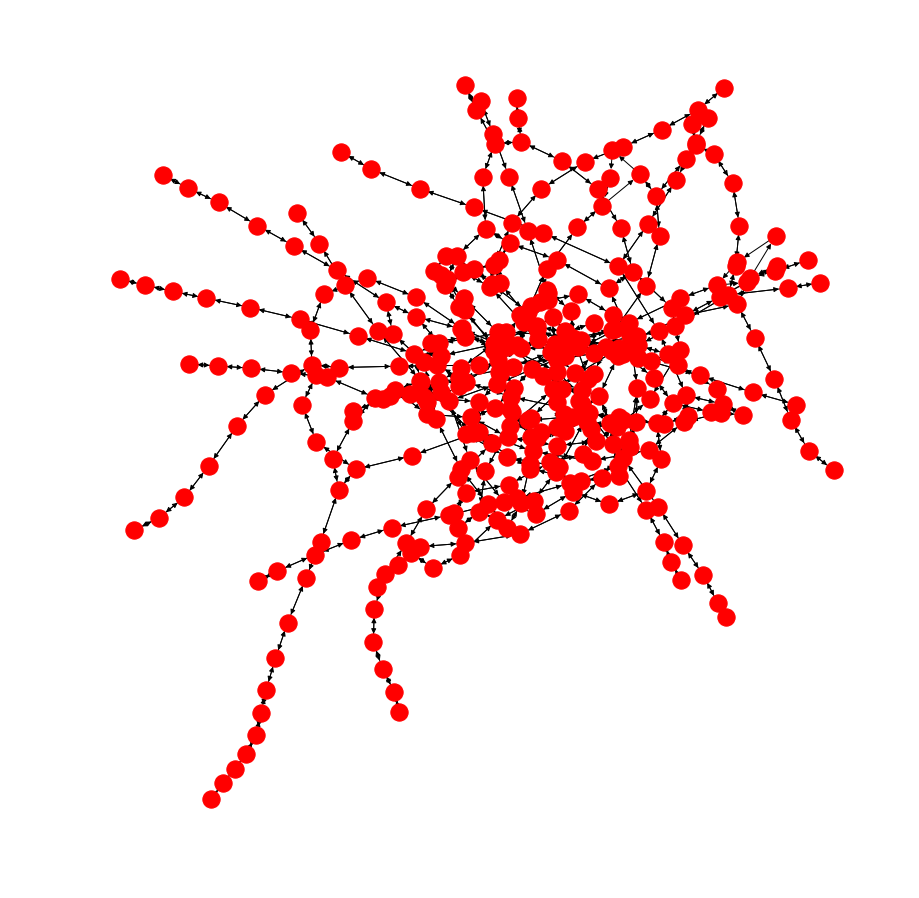

In [9]:
plt.figure(figsize=(12,12))
nx.draw(MG, label=False)

plt.show()

In [ ]:
#The Johnson's algorithm will give shortest paths between stations for every verteces
#I used it because it's fast, and usable with weight and directions

https://en.wikipedia.org/wiki/Johnson%27s_algorithm

In [10]:
shortestMulti = nx.johnson(MG)

In [24]:
shortestMulti[3][47]

[3, 210, 95, 292, 361, 208, 333, 334, 323, 222, 221, 74, 195, 47]

In [ ]:
#MAIN CLASS DEFINITION: Chromosome, it represents a set of nodes(genes).
#******-------------------------------------------------------------------******
#the class function __ini__ is the constructor of the class, it demands a set of stations(index)
#----------------------------------------------------------------------------
#the shuffleGenes is a function in order to shuffle the nodes/genes in the chromosome
#-------------------------------------------------------------------------------
#mutationGene : is a fuction that permits to mutate some gene in the sequence of the chromosome, thanks to a probability  Pm.
#the function "reads" the chromosome from the beginning, nade after node, then a probability is done (randomly), if it is below
#a Threshold Pm that gene will be mutated
#Mutation adds some randomness to a chromosome and brings some variety into the population
#---------------------------------------------------------------------------------
#pathWay : This function creates the optimal pathway between 2 nodes using the dictionnary created with networkx (see above)
#For example between 2 nodes (3,47) the optimal pathway calculated by Johnson's algorithm 
#will be [3, 210, 95, 292, 361, 208, 333, 334, 323, 222, 221, 74, 195, 47]
#THE CHROMOSOME IS ENCODED LIKE THAT
#Chromosome  = |23|45|156|176 etc..... and pathway give the optimal path from 23 to 45, 45 to 156, 156 to 176......
#This way, the Genetic Algorithm can optimize the "genes" and there will always be a link between stations
#-----------------------------------------
#__repr__ : it's a function to overload the print function for an object of Chromosome's class
#example
#--------------------
#test = Chromosome([1,2,3,4,5])
#print(test)
#output >> Chromosome :|1|2|3|4|5|

In [11]:
class Chromosome:
    def __init__(self, nodes):
        self.nodes = nodes       
    
    def shuffleGenes(self):
        random.shuffle(self.nodes)   
    
    #Order Changing Mutation, 1 gene is selected thanks to Pm probability then swapped with the other node(cant duplicate)
    def mutationGene(self, Pm, inParis):
        self.inParis = inParis
        self.Pm = Pm
        for i in range(0, len(self.nodes)):
            self.randMutate = random.random()
            if self.randMutate < self.Pm:
                self.indexMutation = random.randint(0,len(self.inParis)-1)
                self.mutateTo = self.inParis[self.indexMutation]
                self.nodes[i] = self.mutateTo


    def pathWay(self, Multigraph): #Multigraph come from the Johnson Networkx calculation for shortest path between 2 nodes
        self.Multigraph = Multigraph
        self.totalPath = []
        for i in range(0, len(self.nodes)-1):        
            if i+1 is not None:
                self.totalPath = merge(self.totalPath, self.Multigraph[self.nodes[i]][self.nodes[i+1]])   
        return self.totalPath       
        
    def __repr__(self):
        self.strNodes = "Chromosome :"
        for i in self.nodes:
            self.node = str(i)
            self.strNodes = self.strNodes + "|" + self.node
        self.strNodes = self.strNodes + "|"
        return self.strNodes

In [ ]:
#FUNCTION PathwayDuration : calculate the path time for a chromosome
#-----------------------------------------------------------------
#PARAMETERS :
#chromosome : the object of class Chromosome to use
#multipath : the Dictionary of shortest path between nodes
#mainDataframe : dataframe with connection between stations and traveling time (here it is called "df")

In [12]:
def PathwayDuration(chromosome, multipath, mainDataframe):
    b = 0
    for i in range(1, len(chromosome.pathWay(multipath))):
        a = np.array(df['Time'].loc[(mainDataframe.Station == chromosome.pathWay(multipath)[i-1]) & 
                               (mainDataframe.Connection == chromosome.pathWay(multipath)[i])].values)
        b = b + a 
    return int(b)

In [ ]:
#FUNCTION crossoverSinglePoint:
#A function that returns 1 child chromosome from 2 parents chromosomes
#2 chromosomes are splitted halfway then for example
#Chrom 1 = A|B|C|D and chrom2 = E|F|G|H then we obtain : A|B + G|H
#Child1 = A|B|G|H and if you permute chromosomes in a second call you obtain child2 = E|F|C|D

In [13]:
#Crossover SinglePoint Encoding (1)ABC DEF + (2)GHI KLM --> ABC(1) GHI(2) (in the order of the 2d chromosome genes)
def crossoverSinglePoint(chromo1, chromo2):
    lenChromo = int(len(chromo1.nodes) / 2)
    childrenChr = np.append(chromo1.nodes[0:lenChromo], chromo2.nodes[lenChromo:len(chromo1.nodes)])
    return childrenChr
    

In [ ]:
#FUNCTION merge:
#works with np.array
#function can merge 2 list where last element of one(a) is the first element of the second(b)
#for example [1,2,3,4] + [4,5,6] = [1,2,3,4,5,6]

In [14]:
def merge(a, b): #a,b are numpy.array
    c = a[:-1] + b[:]
    return c    

In [ ]:
#FUNCTION NewNameFit2
#return the score to maximize, 1 = best answer, it means that all stations with a different name, have been visited
#There are 251 stations inside paris with a different name, I divide unique name from the list of the nodes by 251,
#in order to obtain my score.
#the len() is here to prevent the pathway to go beyond 1200 stations visited that could take mora than 20 hours to visit all
#Remark : fitScore = 0 if there is a station visited outside paris and if the length of the chromosome goes beyond 1200(too long)

In [15]:
def NewNameFit2(uniqueNodeName, chromosome, MultiG, outsideNodes):
    if len(chromosome.pathWay(MultiG)) < 1200:
        NameList = np.array([])
        for i in chromosome.pathWay(MultiG):
            if i not in outsideNodes:
                NameList = np.append(NameList, uniqueNodeName[i])
                fitScore = len(np.unique(NameList)) / 251
            else:
                fitScore = 0
    else:
        fitScore = 0
    return fitScore

In [ ]:
#***********________________________________________******************
#***********___MAIN LOOP OF THE GENETIC ALGORITHM___******************
#***********________________________________________******************
#First a population is generated, a population is a set of chromosome with a sequence of different nodes/genes for each
#population is an array of objects of class Chromosome()
#population will evolve at each iteration of the genetic algorithm
#*****-----------------------------------------------------------------
#Then, from the initial population 2(could be changed) best scores are kept, from the best candidates 9(could be changed) 
#and From the 9 best candidates 18 children are created with the crossover Function according to the function :
# ABCD and EFGH gives ABGH, EFCD,  
#Finally, depending to a probability called 0.3, a chromosome can be selected for mutation then each of its gene can
#be mutated with Pm probability, for example if the chromosome has a length of 100 and the probability for a gene to mutate is
#Pm = 0.1 there will an average of 10 genes mutated, can be lower or higher depends of the value of Pm returned
#***********------------------------------------------------------------
#FINALLY, we obtain a new population composed of Chrildren Chromosome and 2 best Chromosomes from the former population and each
#chromosome could be mutated or not
#Then the new population will have a new iteration etc.....

In [16]:
#NEW ALGO split avec duplicate CROSSOVER SINGLE POINT
#MAIN LOOP
population = np.array([]) #initialization of the population array
#startGene = 268
X_opti = np.array([]) #initialization of X axis for the graph
Y_opti = np.array([]) #initialization of Y axis for the graph

#CREATION OF THE INITIAL POPULATION
for i in range(0, 100):
    tmpNode = np.random.randint(375, size = (100))
    #tmpNode[0] = startGene
    tmpC = Chromosome(tmpNode)
    population = np.append(population, tmpC)

#MAIN LOOP here population evolved continuously with crossovers and mutations
#NUMBER OF ITERATION z
for z in range(0,10000):
    fitList = np.array([])
    
    #fitList = array of the score of the population
    for i in range(0,len(population)):
        fitList = np.append(fitList, NewNameFit2(nameTable.nameStation, population[i], shortestMulti, outsideParis.indexStation))
        
    #select the 10 best chromosomes according to their scores, the array is ordered from higher to lower score
    IndexfitBest = heapq.nlargest(10, range(len(fitList)), fitList.take)
    population_best = np.take(population, IndexfitBest)
    
    #initialization of the selected chromosomes with 2 best chromosomes
    child = np.array([population_best[0], population_best[1]]) #2 best chromosomes kept
    
    #Creation of the children :
    for u in range(1, len(population_best)):
        crossChr1 = Chromosome(crossoverSinglePoint(population_best[u-1], population_best[u]))
        crossChr2 = Chromosome(crossoverSinglePoint(population_best[u], population_best[u-1]))
        child = np.append(child, crossChr1)
        child = np.append(child, crossChr2)
    population = child
    
    #Mutation each chromosome has 30% to be selected for mutation
    for mutIter in range(0, len(population)-1):
        rand = random.random()
        if rand < 0.3:
            population[mutIter].mutationGene(0.1, insideParis.indexStation) # a mutation has 10% chance to occur
    print(np.max(fitList)) #Print the best score of the best candidate
    X_opti = np.append(X_opti, z) #keep track of iterations
    Y_opti = np.append(Y_opti, np.max(fitList)) #keep track of the best score obtained
    print('Iteration {}:'.format(z, fitList)) #print iteration number and max score for the iteration

print(population)


0.0
Iteration 0:
0.0
Iteration 1:
0.0
Iteration 2:
0.0
Iteration 3:
0.0
Iteration 4:
0.0
Iteration 5:
0.0
Iteration 6:
0.0
Iteration 7:
0.0
Iteration 8:
0.8605577689243028
Iteration 9:
0.8605577689243028
Iteration 10:
0.8605577689243028
Iteration 11:
0.8605577689243028
Iteration 12:
0.8605577689243028
Iteration 13:
0.8645418326693227
Iteration 14:
0.8725099601593626
Iteration 15:
0.8884462151394422
Iteration 16:
0.8884462151394422
Iteration 17:
0.8884462151394422
Iteration 18:
0.9043824701195219
Iteration 19:
0.9083665338645418
Iteration 20:
0.9083665338645418
Iteration 21:
0.9083665338645418
Iteration 22:
0.9083665338645418
Iteration 23:
0.9083665338645418
Iteration 24:
0.9123505976095617
Iteration 25:
0.9163346613545816
Iteration 26:
0.9203187250996016
Iteration 27:
0.9203187250996016
Iteration 28:
0.9203187250996016
Iteration 29:
0.9203187250996016
Iteration 30:
0.9203187250996016
Iteration 31:
0.9203187250996016
Iteration 32:
0.9243027888446215
Iteration 33:
0.9243027888446215
Iter

0.9641434262948207
Iteration 249:
0.9641434262948207
Iteration 250:
0.9641434262948207
Iteration 251:
0.9641434262948207
Iteration 252:
0.9641434262948207
Iteration 253:
0.9641434262948207
Iteration 254:
0.9641434262948207
Iteration 255:
0.9641434262948207
Iteration 256:
0.9641434262948207
Iteration 257:
0.9641434262948207
Iteration 258:
0.9641434262948207
Iteration 259:
0.9641434262948207
Iteration 260:
0.9641434262948207
Iteration 261:
0.9641434262948207
Iteration 262:
0.9641434262948207
Iteration 263:
0.9641434262948207
Iteration 264:
0.9641434262948207
Iteration 265:
0.9641434262948207
Iteration 266:
0.9641434262948207
Iteration 267:
0.9641434262948207
Iteration 268:
0.9641434262948207
Iteration 269:
0.9641434262948207
Iteration 270:
0.9641434262948207
Iteration 271:
0.9641434262948207
Iteration 272:
0.9641434262948207
Iteration 273:
0.9641434262948207
Iteration 274:
0.9641434262948207
Iteration 275:
0.9641434262948207
Iteration 276:
0.9641434262948207
Iteration 277:
0.964143426294

KeyboardInterrupt: 

In [ ]:
#Thanks to X_opti and Y_opti we can draw the graph
#With the number of iterations in the X axis and the number of different stations visited on the Y axis

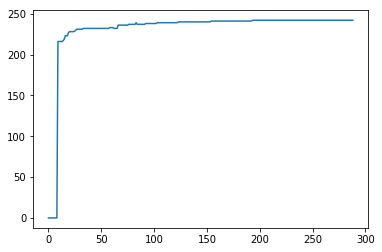

In [17]:
plt.plot(X_opti, Y_opti * 251)
plt.show()

In [19]:
fitList

array([0.96414343, 0.96414343, 0.96414343, 0.        , 0.96414343,
       0.96414343, 0.96414343, 0.94023904, 0.92828685, 0.96414343,
       0.96414343, 0.96414343, 0.96414343, 0.96414343, 0.96414343,
       0.96414343, 0.96414343])

In [20]:
population[1]

Chromosome :|358|186|49|250|214|339|160|78|263|14|270|367|203|73|375|215|279|354|35|93|305|290|137|285|136|221|128|23|50|124|60|97|223|22|369|148|105|105|194|131|337|198|368|208|97|279|356|269|170|82|369|144|57|172|342|228|175|317|315|271|249|40|124|77|321|6|225|122|370|109|25|198|240|15|245|150|70|238|171|16|177|267|165|218|77|52|251|310|92|363|261|222|277|244|0|362|328|266|7|338|

In [21]:
print(PathwayDuration(population[0],shortestMulti, df )/3600)

19.476388888888888


In [22]:
len(population[1].pathWay(shortestMulti))

1189

In [ ]:
NewNameFit2(nameTable.nameStation, population[1], shortestMulti, outsideParis.indexStation)

In [ ]:
len(population[1].pathWay(shortestMulti))

In [ ]:
population[0].pathWay(shortestMulti)

In [ ]:
13 * 23 + 9

In [ ]:
544 * 66